# Boston Crime Data Project

Downloads libraries and data and creates dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bcd = pd.read_csv('crime.csv', parse_dates = ['OCCURRED_ON_DATE'])
bcd

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


Replaces all Y values in SHOOTING column with 1 and all NaN values with 0, then casts them from integers to booleans (1 = True, 0 = False)

In [3]:
bcd['SHOOTING'] = bcd['SHOOTING'].fillna(0) 
bcd['SHOOTING'] = bcd['SHOOTING'].replace(['Y'], 1) 
bcd['SHOOTING'] = bcd['SHOOTING'].astype(bool)
# bcd

## What types of crime are most common? 

Creates a histogram showing the distribution of crimes across offense categories

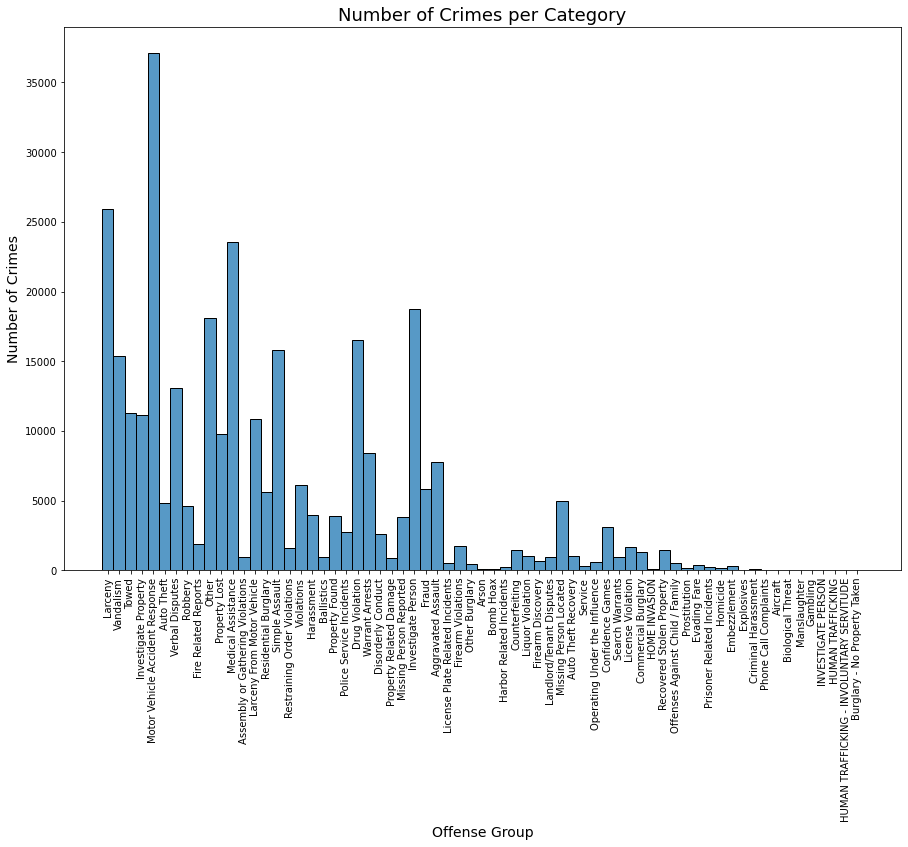

In [4]:
plt.figure(figsize = (15,10))
plt.title('Number of Crimes per Category', fontsize = 18)
plt.xlabel('Offense Group', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Number of Crimes', fontsize = 14)

sns.histplot(bcd, x = bcd['OFFENSE_CODE_GROUP'])
plt.show()

#### Results:

The most common type of crime report is by far Motor Vehicle Accident Response, followed by Larceny, Medical Assistance, and Investigate Person. 

Creates 3 different dataframes that each only contain the offense types with the most reports. 

In [5]:
carcrash = bcd.loc[bcd['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response']
larceny = bcd.loc[bcd['OFFENSE_CODE_GROUP'] == 'Larceny']
medical = bcd.loc[bcd['OFFENSE_CODE_GROUP'] == 'Medical Assistance']

Creates 3 histograms of the distribution of crimes in each of the 3 most common offense types. 

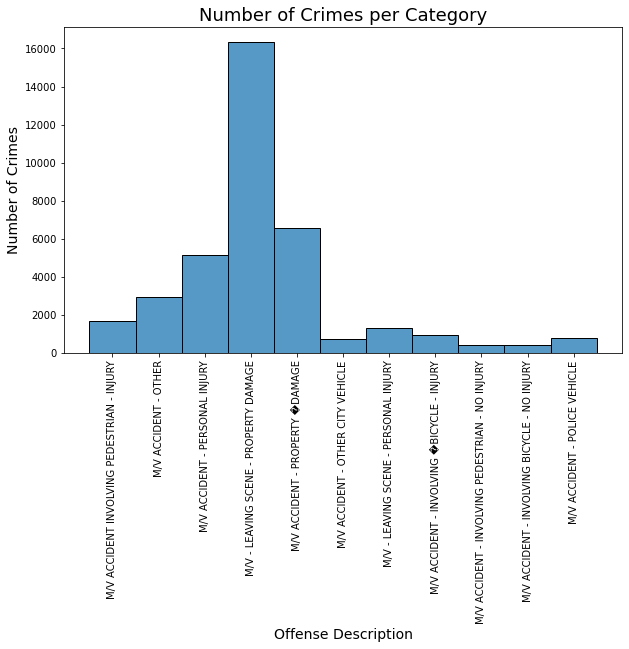

In [6]:
plt.figure(figsize = (10, 6))
plt.title('Number of Crimes per Category', fontsize = 18)
plt.xlabel('Offense Description', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Number of Crimes', fontsize = 14)

sns.histplot(carcrash, x = carcrash['OFFENSE_DESCRIPTION'])
plt.show()

In motor vehicle accidents, people most commonly call the police when there is property damage and the driver leaves the scene. The 2 other major reason for police reports in the event of a car crash are property damage when the driver stays at the scene and personal injury. 

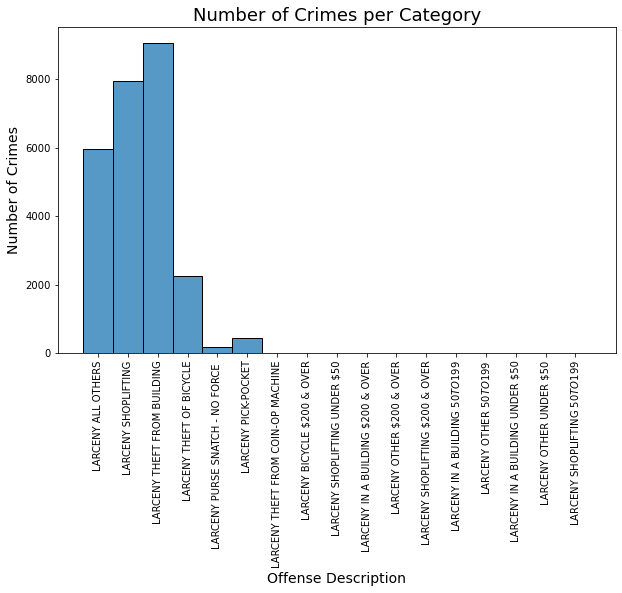

In [7]:
plt.figure(figsize = (10, 6))
plt.title('Number of Crimes per Category', fontsize = 18)
plt.xlabel('Offense Description', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Number of Crimes', fontsize = 14)

sns.histplot(larceny, x = larceny['OFFENSE_DESCRIPTION'])
plt.show()

Most theft occurs from buildings (presumably homes), followed by shoplifting, other kinds of theft, and bicycle theft. 

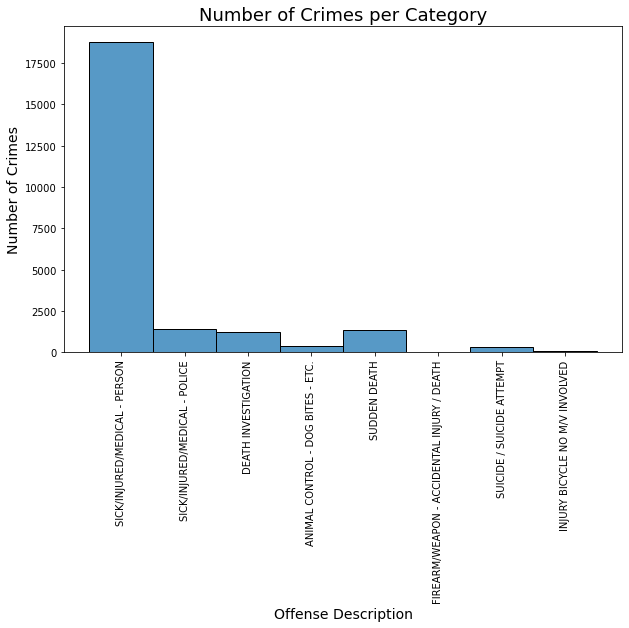

In [8]:
plt.figure(figsize = (10, 6))
plt.title('Number of Crimes per Category', fontsize = 18)
plt.xlabel('Offense Description', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Number of Crimes', fontsize = 14)

sns.histplot(medical, x = medical['OFFENSE_DESCRIPTION'])
plt.show()

In the event that medical assisstance is required, it is usually for general citizens. Following that, injury of policemen, sudden death, and death investigation are the most common police reports. 

## How did gun violence rates change from 2016 to 2017?

Finds only the rows where SHOOTING == True, then counts the number of shootings per month in 2016 and 2017

In [17]:
shootings_2016 = bcd.loc[(bcd['SHOOTING'] == True) & (bcd['YEAR'] == 2016)]
shootings_count_2016 = shootings_2016.groupby(['MONTH']).count()
shootings_count_2016 = shootings_count_2016['SHOOTING']
shootings_count_2016

MONTH
1     17
2     13
3     12
4     13
5     22
6     34
7     28
8     28
9     21
10    33
11    28
12    30
Name: SHOOTING, dtype: int64

In [18]:
shootings_2017 = bcd.loc[(bcd['SHOOTING'] == True) & (bcd['YEAR'] == 2017)]
shootings_count_2017 = shootings_2017.groupby(['MONTH']).count()
shootings_count_2017 = shootings_count_2017['SHOOTING']
shootings_count_2017

MONTH
1     22
2     23
3     18
4     38
5     22
6     41
7     39
8     22
9     37
10    38
11    23
12    47
Name: SHOOTING, dtype: int64

Creates a bar graph using the total number of shootings in 2016 and 2017 to see which year had a greater number of shootings. 

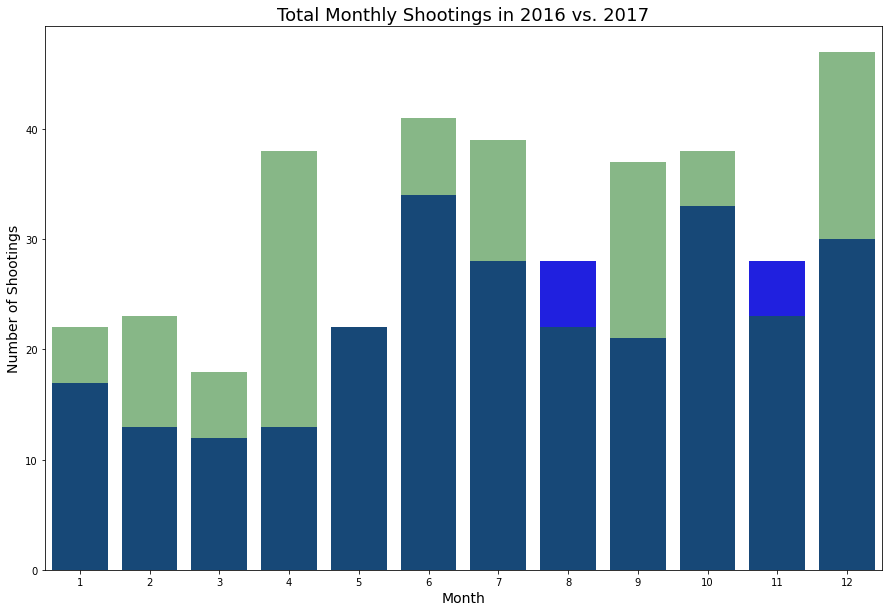

In [19]:
plt.figure(figsize = (15,10))

sns.barplot(x = shootings_count_2016.index, y = shootings_count_2016, color = 'blue')
sns.barplot(x = shootings_count_2017.index, y = shootings_count_2017, color = 'green', alpha = 0.5)

plt.title('Total Monthly Shootings in 2016 vs. 2017', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Shootings', fontsize = 14)
plt.show()

#### Results:

In almost every month, the number of shootings was higher in 2017 than in 2016, so the overall gun violence increased between the two years. 

# QUESTION something about gun deaths or something

Creates a dataframe from containing only homicides

In [32]:
homicides = bcd.loc[bcd['OFFENSE_CODE_GROUP'] == 'Homicide']
homicides

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,True,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
5689,I182064699,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,466,True,2018-08-14 09:30:00,2018,8,Tuesday,9,Part One,DEERING RD,42.284140,-71.093051,"(42.28414025, -71.09305138)"
6278,I182064056,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,410,True,2018-08-11 23:14:00,2018,8,Saturday,23,Part One,MANCHESTER ST,42.274040,-71.076301,"(42.27404039, -71.07630093)"
10813,I182059055,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,908,False,2018-07-26 18:14:00,2018,7,Thursday,18,Part One,SHANDON RD,42.295054,-71.089041,"(42.29505434, -71.08904077)"
11021,I182058835,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,435,True,2018-07-25 22:57:00,2018,7,Wednesday,22,Part One,NORFOLK ST,42.288048,-71.077667,"(42.28804798, -71.07766654)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312521,I152056746,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E13,639,False,2015-07-02 16:30:00,2015,7,Thursday,16,Part One,ROBINWOOD AVE,42.316240,-71.112670,"(42.31624019, -71.11267011)"
312945,I152056250,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",A1,112,False,2015-07-08 12:15:00,2015,7,Wednesday,12,Part One,CHAUNCY ST,42.352517,-71.061129,"(42.35251737, -71.06112927)"
313764,I152055311,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,322,True,2015-07-04 22:47:00,2015,7,Saturday,22,Part One,GLENBURNE ST,42.315122,-71.082520,"(42.31512218, -71.08252020)"
314239,I152054787,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,281,True,2015-07-02 23:08:00,2015,7,Thursday,23,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"


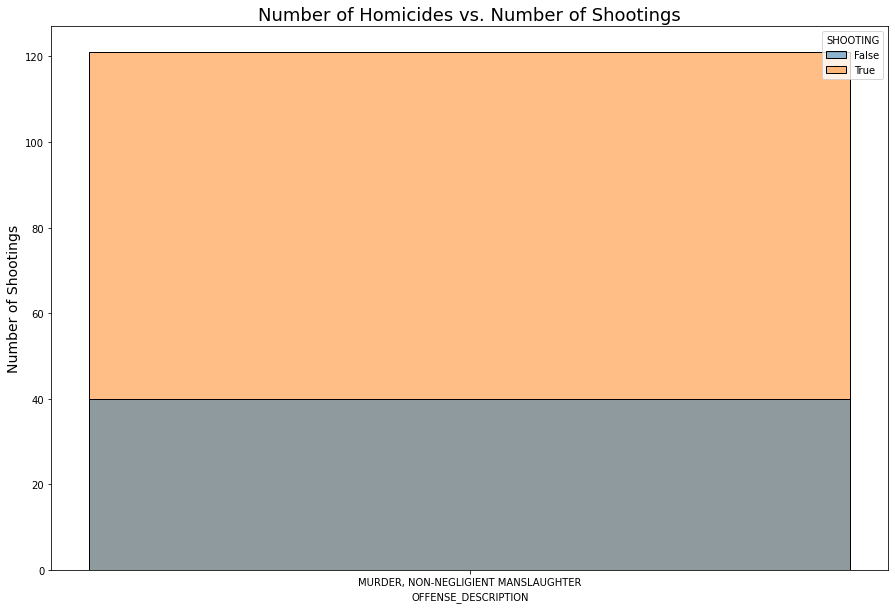

In [36]:
plt.figure(figsize = (15,10))

sns.histplot(bcd, x = homicides['OFFENSE_DESCRIPTION'], hue = homicides['SHOOTING'])

plt.title('Number of Homicides vs. Number of Shootings', fontsize = 18)
# plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Shootings', fontsize = 14)
plt.show()